In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from typing import List

In [2]:
red_wines = pd.read_csv("dataset/winequality-red.csv", sep=";")
white_wines = pd.read_csv("dataset/winequality-white.csv", sep=";")

In [3]:
red_wines["wine_type"] = "red"
white_wines["wine_type"] = "white"

In [4]:
def encode_quality(quality):
    if quality < 5:
        return "low"
    elif quality < 7:
        return "medium"
    return "high"


red_wines["quality_label"] = pd.Categorical(red_wines["quality"].apply(encode_quality), categories=["low", "medium", "high"], ordered=True)
white_wines["quality_label"] = pd.Categorical(white_wines["quality"].apply(encode_quality), categories=["low", "medium", "high"], ordered=True)

In [5]:
wines = pd.concat([red_wines, white_wines], ignore_index=True)
wines = wines.sample(frac=1, random_state=42)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,medium
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,high
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


In [6]:
def concat_described(data_frames: List[pd.DataFrame], subset_attributes : List[str], keys: List[str], drop_count = True):
    assert len(data_frames) == len(keys), "Number of data frames and keys should be equal"
    
    described_dfs = []
    for df in data_frames:
        described_dfs.append(df[subset_attributes].describe().drop("count") if drop_count else df[subset_attributes].describe())
        
    
    multi_level_data = {}
    
    for attr in subset_attributes:
        attr_data = pd.DataFrame()
        for i, key in enumerate(keys):
            attr_data[key] = described_dfs[i][attr]
            
        multi_level_data[attr] = attr_data
        
    return pd.concat(multi_level_data, axis=1)

In [7]:
concat_described(data_frames = [wines.where(wines["wine_type"] == "red"), 
                                wines.where(wines["wine_type"] == "white")], 
                 subset_attributes=["residual sugar", "total sulfur dioxide", "sulphates", "alcohol", "volatile acidity", "quality"],
                 keys=["red", "white"],
                 drop_count=True).style.set_sticky()

In [8]:
concat_described(data_frames = [wines.where(wines["quality_label"] == "low"), 
                                wines.where(wines["quality_label"] == "medium"),
                                wines.where(wines["quality_label"] == "high")], 
                 subset_attributes=["alcohol", "volatile acidity", "pH", "quality"],
                 keys=["quality low", "quality medium", "quality high"],
                 drop_count=False)

alcohol                             volatile acidity                 \
      quality low quality medium quality high      quality low quality medium   
count  246.000000    4974.000000  1277.000000       246.000000    4974.000000   
mean    10.184350      10.265275    11.433359         0.465163       0.346423   
std      0.999035       1.070626     1.215620         0.245677       0.165660   
min      8.000000       8.000000     8.500000         0.110000       0.080000   
25%      9.400000       9.400000    10.700000         0.280000       0.230000   
50%     10.050000      10.000000    11.500000         0.380000       0.300000   
75%     10.900000      11.000000    12.400000         0.610000       0.420000   
max     13.500000      14.900000    14.200000         1.580000       1.330000   

                            pH                                 quality  \
      quality high quality low quality medium quality high quality low   
count   1277.00000  246.000000    4974.000000  1277.000000  246.000000   
mean       0.28917    3.234797       3.215346     3.227651    3.878049   
std        0.11696    0.191313       0.159461     0.159094    0.327897   
min        0.08000    2.740000       2.720000     2.840000    3.000000   
25%        0.20000    3.090000       3.110000     3.120000    4.000000   
50%        0.27000    3.225000       3.200000     3.220000    4.000000   
75%        0.34000    3.360000       3.320000     3.340000    4.000000   
max        0.91500    3.900000       4.010000     3.820000    4.000000   

                                   
      quality medium quality high  
count    4974.000000  1277.000000  
mean        5.570165     7.158966  
std         0.495102     0.376348  
min         5.000000     7.000000  
25%         5.000000     7.000000  
50%         6.000000     7.000000  
75%         6.000000     7.000000  
max         6.000000     9.000000

### I am unable to properly display multi collumns without using df.style.set_sticky(). Why?

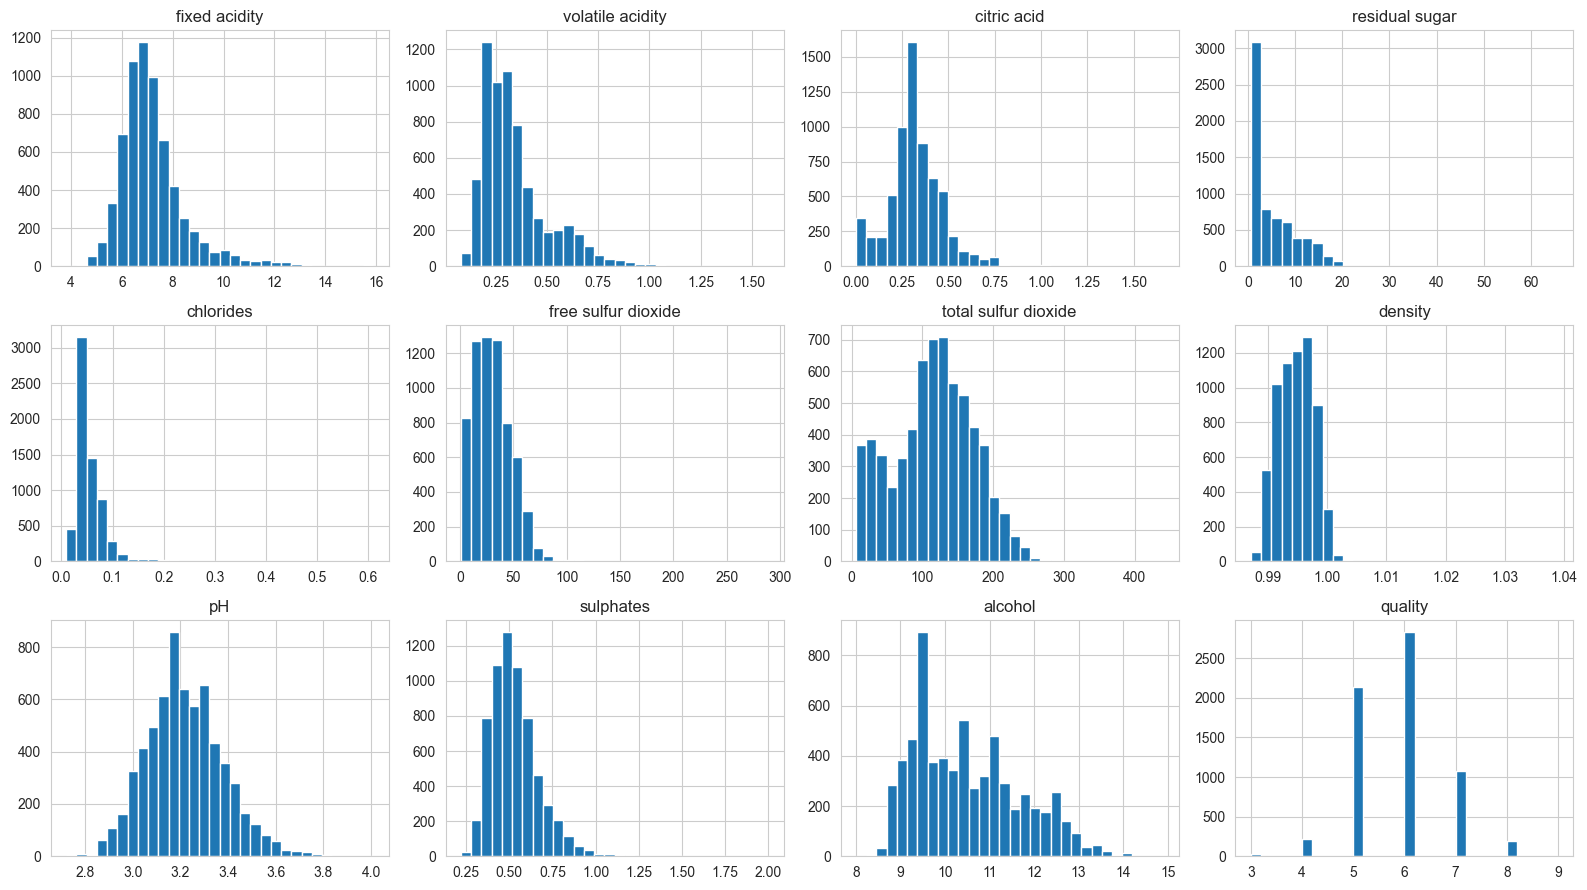

In [9]:
numeric_columns = wines.select_dtypes(include=[np.number])

n_cols = 4
n_rows = int(np.ceil(len(numeric_columns.columns) / n_cols))

numeric_columns.hist(bins=30, figsize=(16, n_rows * 3), layout=(n_rows, n_cols))
plt.tight_layout()
plt.show()

Most of the histograms are unsurprising.

There are very few bad or excellent wines, with most being of medium quality.

The only charts that show multimodal distributions are those for citric acid, total sulfur dioxide, and alcohol.\
Citric acid levels are mostly around 0.3, but there is a small spike in wines containing nearly 0 citric acid, similar to total sulfur dioxide.\
The alcohol chart is particularly interesting, as it features multiple distinct peaks. Maybe this could indicate that wineries tend to use certain grape varieties more frequently rather than blending different species together? I am just guessing.

The charts for fixed acidity and volatile acidity appear to be slightly correlated.\
On the volatile acidity chart, we can see that most wines have a value around 0.2, but some wines have levels five times higher

The rest of charts are skewed left or right. I would not call any chart normal, even tho some of them are close

One wine has alcohol at 14.9%. I would count it as outlier



In [10]:
central_tendency_measures = pd.DataFrame({
    "mean" : numeric_columns.mean(),
    "median" : numeric_columns.median(),
    "mode" : numeric_columns.mode().iloc[0]
})
display(central_tendency_measures)

,mean,median,mode
fixed acidity,7.215307,7.00000,6.8000
volatile acidity,0.339666,0.29000,0.2800
citric acid,0.318633,0.31000,0.3000
residual sugar,5.443235,3.00000,2.0000
chlorides,0.056034,0.04700,0.0440
free sulfur dioxide,30.525319,29.00000,29.0000
total sulfur dioxide,115.744574,118.00000,111.0000
density,0.994697,0.99489,0.9972
pH,3.218501,3.21000,3.1600
sulphates,0.531268,0.51000,0.5000


Residual sugars are interesting. Even tho mode is at 2.0 the mean and median are higher. Moreover mean is higher, then median so there are probalby wines, that contain lots of residual sugars (we can confirm it looking at the chart). \
I don't see anything more on this table, that is worth mentioning

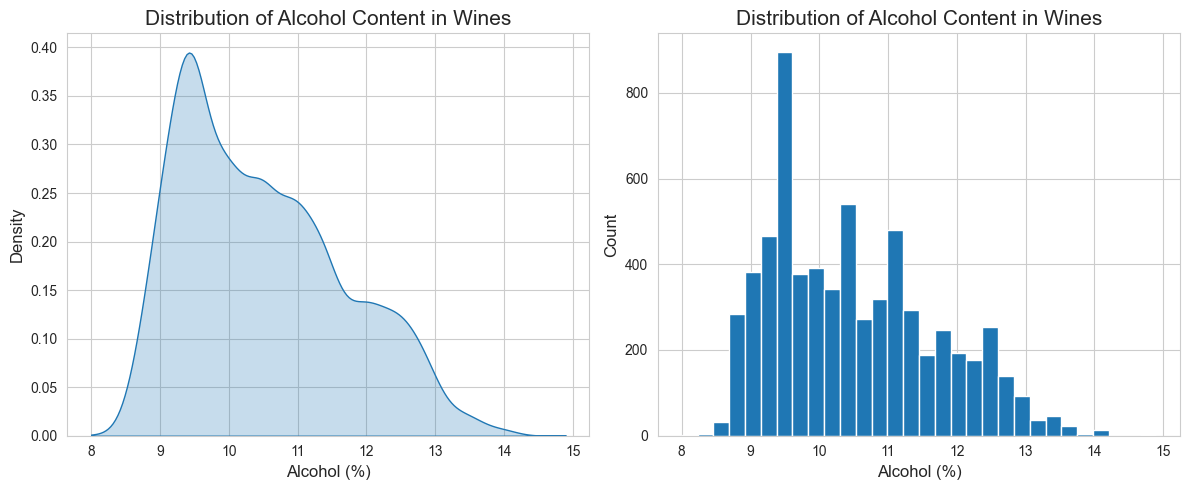

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.kdeplot(wines["alcohol"], fill = True, ax=axes[0], cut=0)

axes[0].set_title("Distribution of Alcohol Content in Wines", fontsize=15)
axes[0].set_xlabel("Alcohol (%)", fontsize=12)
axes[0].set_ylabel("Density", fontsize=12)

wines["alcohol"].hist(bins=30, ax=axes[1])

axes[1].set_title("Distribution of Alcohol Content in Wines", fontsize=15)
axes[1].set_xlabel("Alcohol (%)", fontsize=12)
axes[1].set_ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [12]:
print(f"Median for alcohol: {wines['alcohol'].median():.2f}")
print(f"Mean for alcohol: {wines['alcohol'].mean():.2f}")
print(f"Range of alcohol is from {wines['alcohol'].min():.2f} to {wines['alcohol'].max():.2f}")

Median for alcohol: 10.30
Mean for alcohol: 10.49
Range of alcohol is from 8.00 to 14.90


Wine with alcohol 14.9% is an interesting outlier. I wonder how abv correlates with quality.

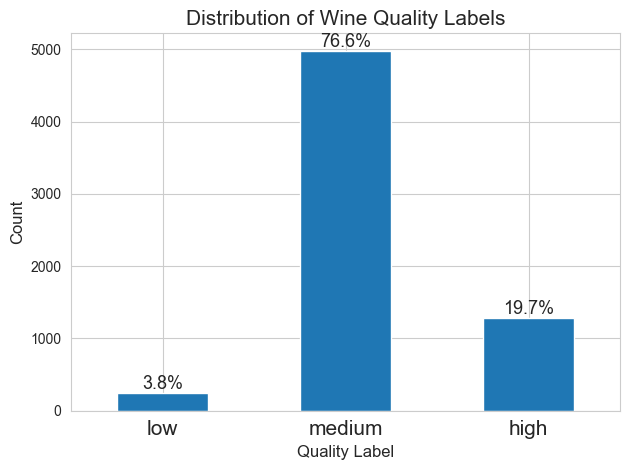

In [13]:
quality_counts = wines["quality_label"].value_counts().sort_index()
quality_counts.plot.bar()

for i, quantity in enumerate(quality_counts):
    plt.text(i, quality_counts.iloc[i], f"{(quantity / quality_counts.sum()) * 100:.1f}%", ha="center", va="bottom", fontsize=13)

plt.title("Distribution of Wine Quality Labels", fontsize=15)
plt.xlabel("Quality Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0, fontsize=15)

plt.tight_layout()
plt.show()

Dataset is not balanced, but there is no tragedy. Medium quality wines take over 3/4 of whole dataset. Low quality wines are below 4%.

<Axes: >

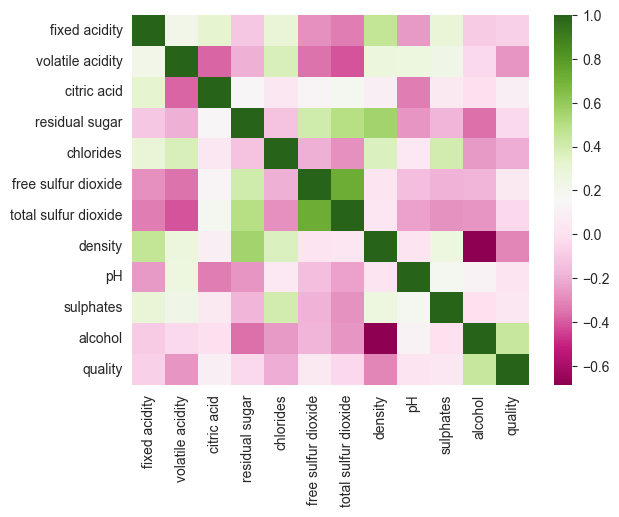

In [14]:
sns.heatmap(numeric_columns.corr(), cmap="PiYG")

Total sulfur dioxide and free sulfur dioxide are strongly correlated. (probably it is obvious because of science) \
Density and residual sugar are correlated. \
Alcohol and density are strongly negatively correlated (alcohol is very light) \
Alcohol and quality are slightly correlated 🥳

In [15]:
wine_subset = wines[["density", "residual sugar", "total sulfur dioxide", "fixed acidity", "wine_type"]]

<Figure size 1200x1000 with 0 Axes>

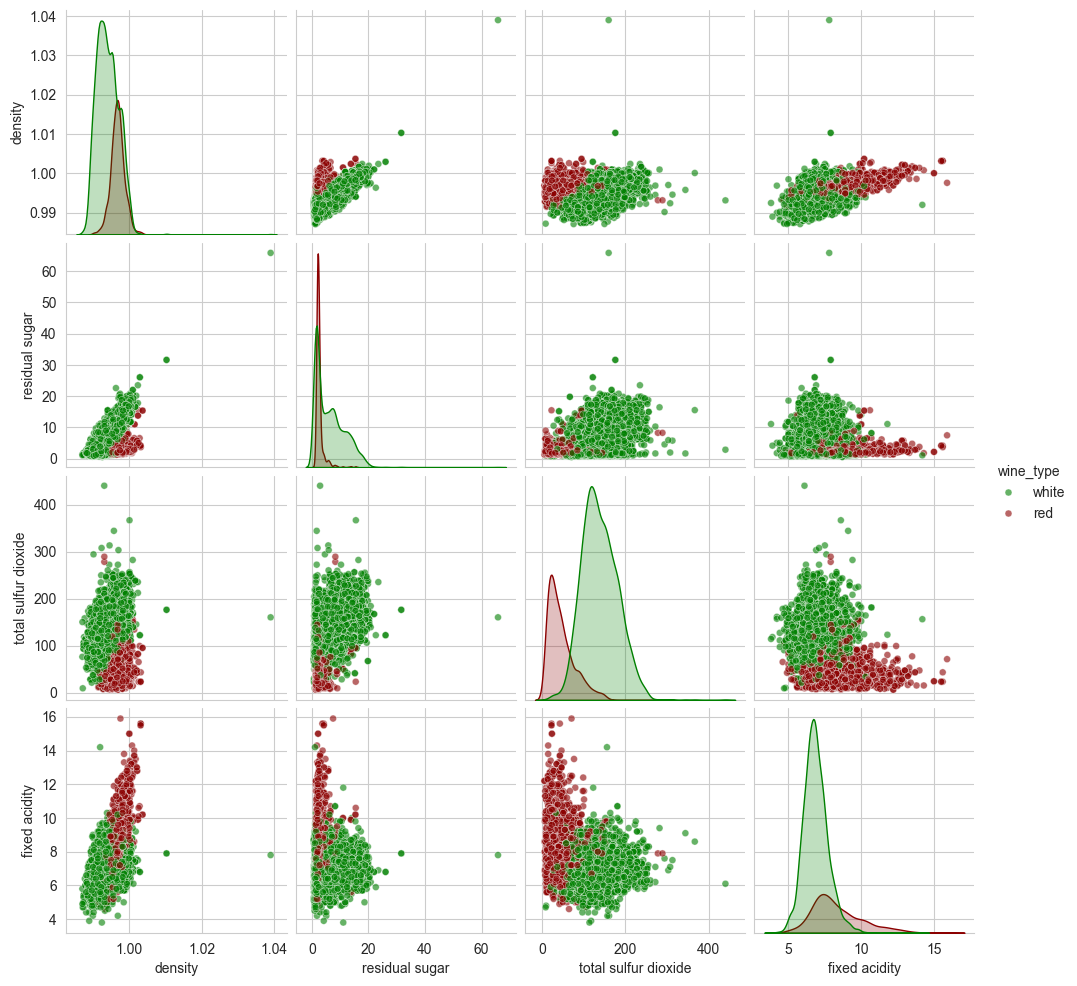

In [16]:
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(wine_subset, 
                        hue="wine_type", 
                        palette={"red": "darkred", "white": "green"},
                        diag_kind="kde",
                        plot_kws={"alpha": 0.6, "s": 25},
                        height=2.5)

I think that fixed acidity and total sulfur dioxide (from now on TSD) are good at separating wine types. TSD shows that red wines chart meets white wines chart from its right side, but from fixed acidity chart we can see that right part of tail in red wines charts is mostly free from white wines. \
TSD and fixed acidity are slightly negatively correlated, but I think we can use them to predict wine type.

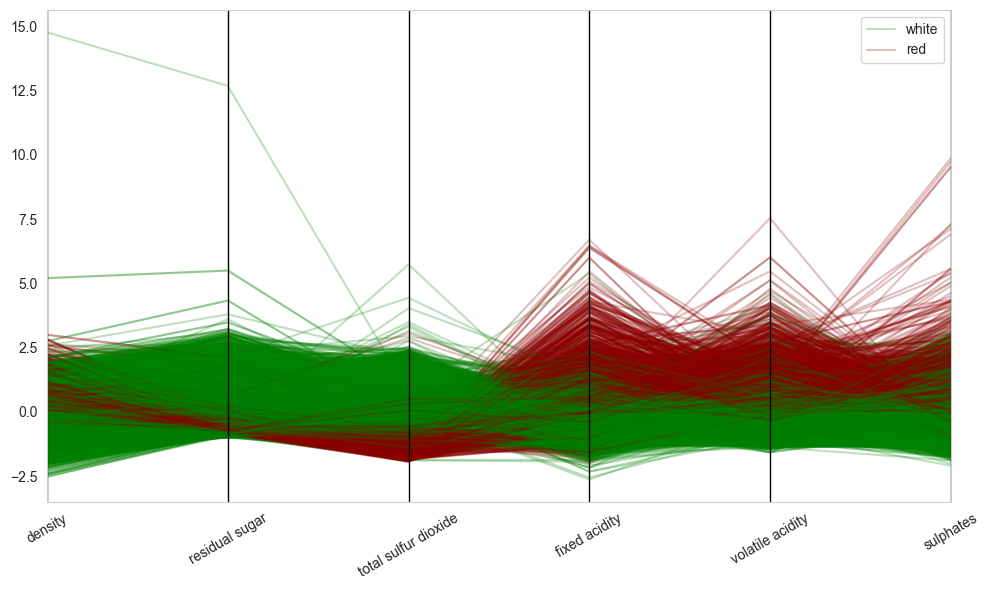

In [17]:
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

interesting_columns = ["density", "residual sugar", "total sulfur dioxide", "fixed acidity", "volatile acidity", "sulphates"]

scaled_wines = scaler.fit_transform(wines[interesting_columns].to_numpy())
scaled_wines = pd.DataFrame(scaled_wines, columns=interesting_columns, index=wines.index)
scaled_wines = pd.concat((scaled_wines, wines["wine_type"]), axis=1)

plt.figure(figsize=(10, 6))

parallel_coordinates(scaled_wines, class_column="wine_type", 
                     cols=interesting_columns,
                     color=["green", "darkred"],
                     alpha=0.25
                     )

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

We can see that white wines have more residual suger and total sulfur dioxide. Red wines have more fixed acidity and volatile acidity.
Lines that connect density and residual sugar are slightly parallel. It can mean that the more sugar, the more dense wine is. It makes sens.

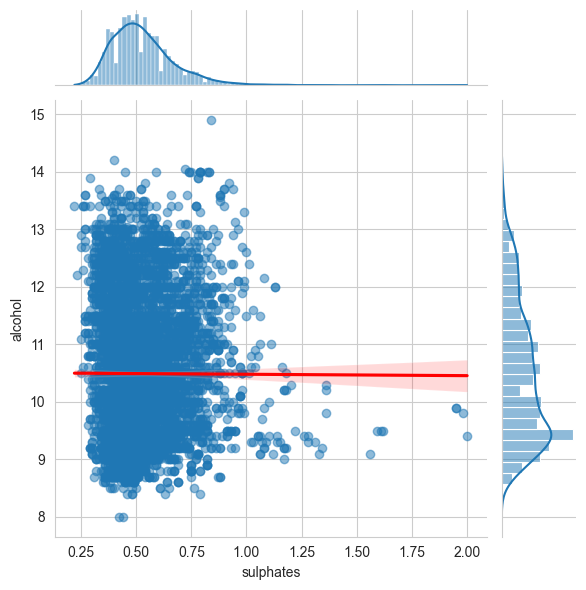

In [18]:
sns.jointplot(data=wines, x="sulphates", y="alcohol", kind="reg", height=6, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.show()

In [19]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(wines["sulphates"], wines["alcohol"])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson Correlation Coefficient: -0.003
P-value: 0.807


Alcohol and sulphates are not correlated at all

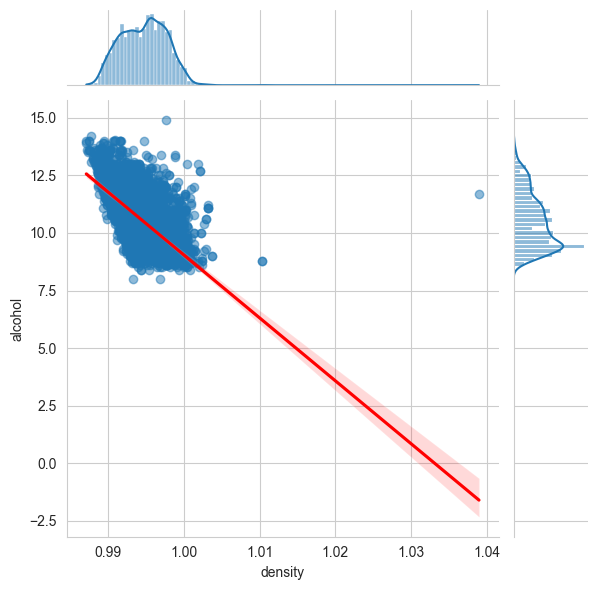

In [20]:
sns.jointplot(data=wines, x="density", y="alcohol", kind="reg", height=6, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.show()

In [21]:
correlation, p_value = pearsonr(wines["density"], wines["alcohol"])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson Correlation Coefficient: -0.687
P-value: 0.000


Alcohol and density are positively correlated

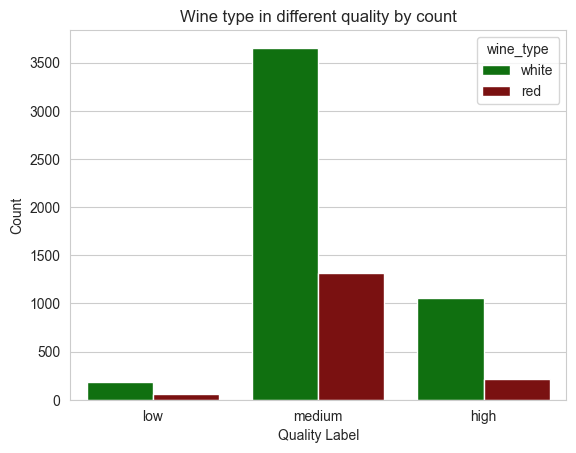

In [22]:
sns.countplot(data=wines, x="quality_label", hue="wine_type", palette={"red": "darkred", "white": "green"})

plt.title("Wine type in different quality by count")
plt.xlabel("Quality Label")
plt.ylabel("Count")
plt.show()

In [23]:
wine_type_quality_count = wines.groupby(["wine_type", "quality"], observed=True).size().reset_index(name="count")
wine_type_quality_count

,wine_type,quality,count
0,red,3,10
1,red,4,53
2,red,5,681
3,red,6,638
4,red,7,199
5,red,8,18
6,white,3,20
7,white,4,163
8,white,5,1457
9,white,6,2198


In [24]:
wine_type_count = wines.groupby("wine_type", observed=True).size().reset_index(name="total")
wine_type_count

,wine_type,total
0,red,1599
1,white,4898


In [25]:
wine_count = pd.merge(wine_type_quality_count, wine_type_count, on="wine_type")
wine_count["percentage"] = (wine_count["count"] / wine_count["total"]) * 100
wine_count

,wine_type,quality,count,total,percentage
0,red,3,10,1599,0.625391
1,red,4,53,1599,3.314572
2,red,5,681,1599,42.589118
3,red,6,638,1599,39.899937
4,red,7,199,1599,12.445278
5,red,8,18,1599,1.125704
6,white,3,20,4898,0.408330
7,white,4,163,4898,3.327889
8,white,5,1457,4898,29.746835
9,white,6,2198,4898,44.875459


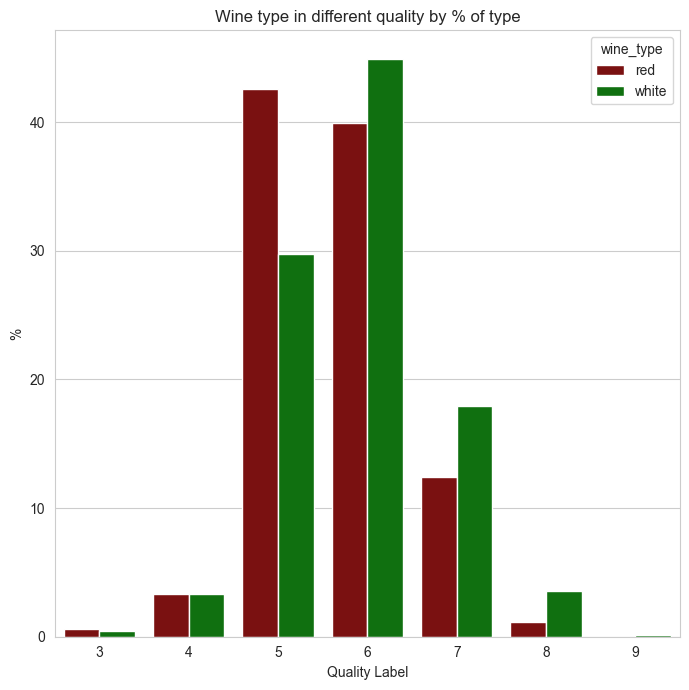

In [26]:
plt.figure(figsize=(7, 7))
sns.barplot(data=wine_count, x="quality", y="percentage", hue="wine_type", palette={"red": "darkred", "white": "green"})


plt.title("Wine type in different quality by % of type")
plt.xlabel("Quality Label")
plt.ylabel("%")

plt.tight_layout()
plt.show()

There are no red wines of quality 9 \
White wines tend to have better quality than red wines

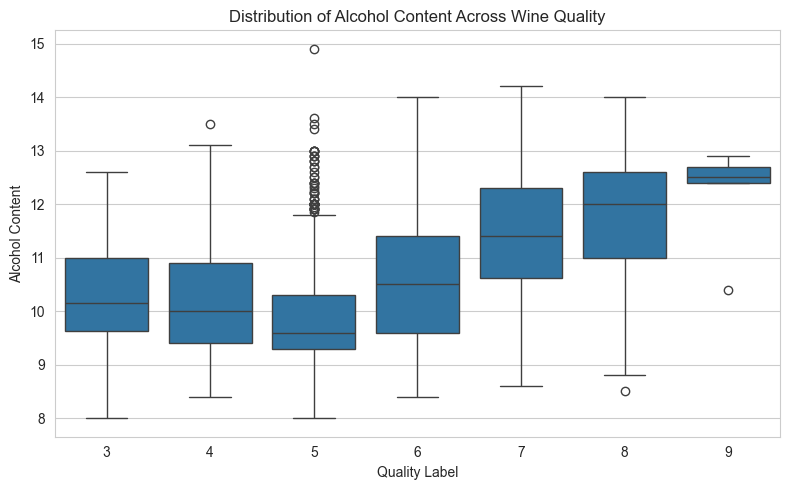

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=wines, x="quality", y="alcohol")

plt.xlabel("Quality Label")
plt.ylabel("Alcohol Content")
plt.title("Distribution of Alcohol Content Across Wine Quality")
plt.tight_layout()
plt.show()

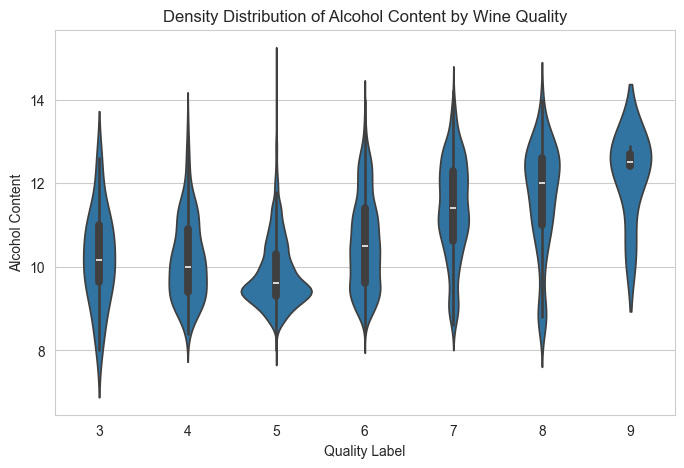

In [28]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=wines, x="quality", y="alcohol")

plt.xlabel("Quality Label")
plt.ylabel("Alcohol Content")
plt.title("Density Distribution of Alcohol Content by Wine Quality")
plt.show()

There is visible pattern that the more alcohol wine has, the better quality. But looking at quality 3 and outliers in quality 5 we can say, then alcohol is unable to save bad wines

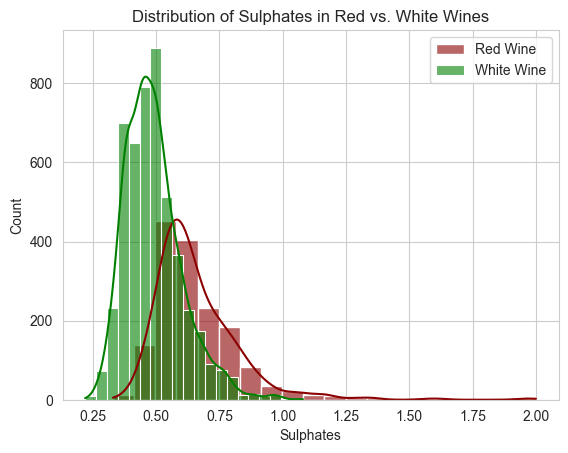

In [29]:
sns.histplot(wines[wines["wine_type"] == "red"]["sulphates"], bins=20, color="darkred", alpha=0.6, label="Red Wine", kde=True)
sns.histplot(wines[wines["wine_type"] == "white"]["sulphates"], bins=20, color="green", alpha=0.6, label="White Wine", kde=True)

plt.xlabel("Sulphates")
plt.ylabel("Count")
plt.title("Distribution of Sulphates in Red vs. White Wines")
plt.legend()
plt.show()

Red wines have typically more sulphates

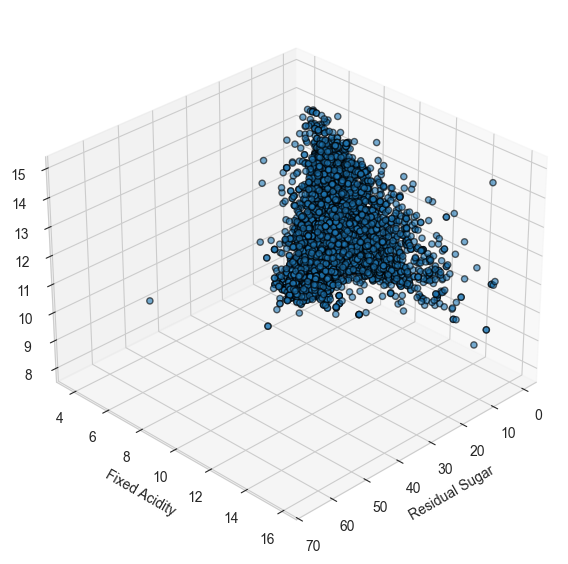

In [30]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(wines["residual sugar"], wines["fixed acidity"], wines["alcohol"], alpha=0.6, edgecolors="k")

ax.set_xlabel("Residual Sugar")
ax.set_ylabel("Fixed Acidity")
ax.set_zlabel("Alcohol")

ax.view_init(elev=30, azim=45, roll=0)

plt.show()

Points indicating the highest residual sugar are at the bottom -> they have less alcohol \
When wine has more fixed acidity it has less residual sugar 


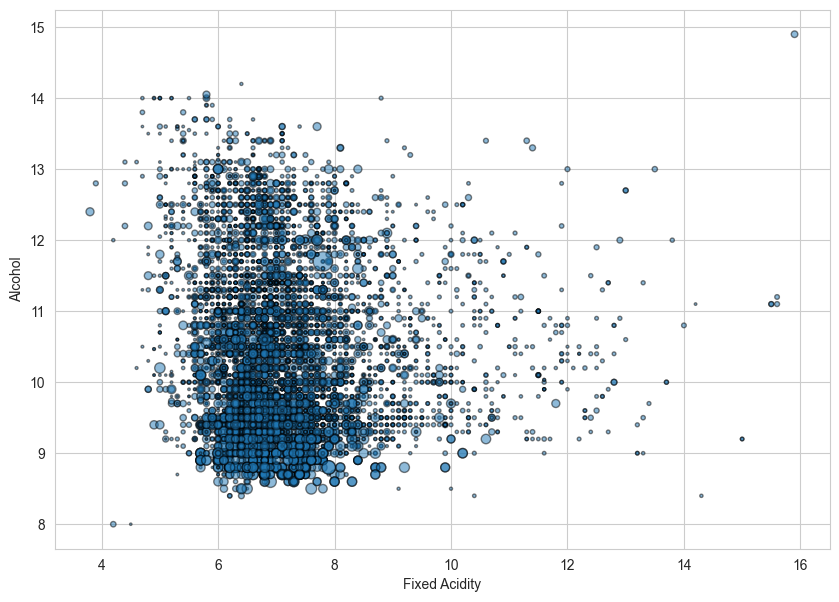

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(wines["fixed acidity"], wines["alcohol"], s=wines["residual sugar"] * 3, alpha=0.5, edgecolors="k")


plt.xlabel("Fixed Acidity")
plt.ylabel("Alcohol")

plt.show()

Advantage is that you do not need to look for good angles. You just need to find good "scaler" to scale sizes of dots \
Disadvantage is that it is less clear and harder for analise (at least for me) \
On this plot I can see more clearly, that when wine has lots of residual sugar it tends to have less alcohol. It makes sens, because yeast uses sugar to make alcohol

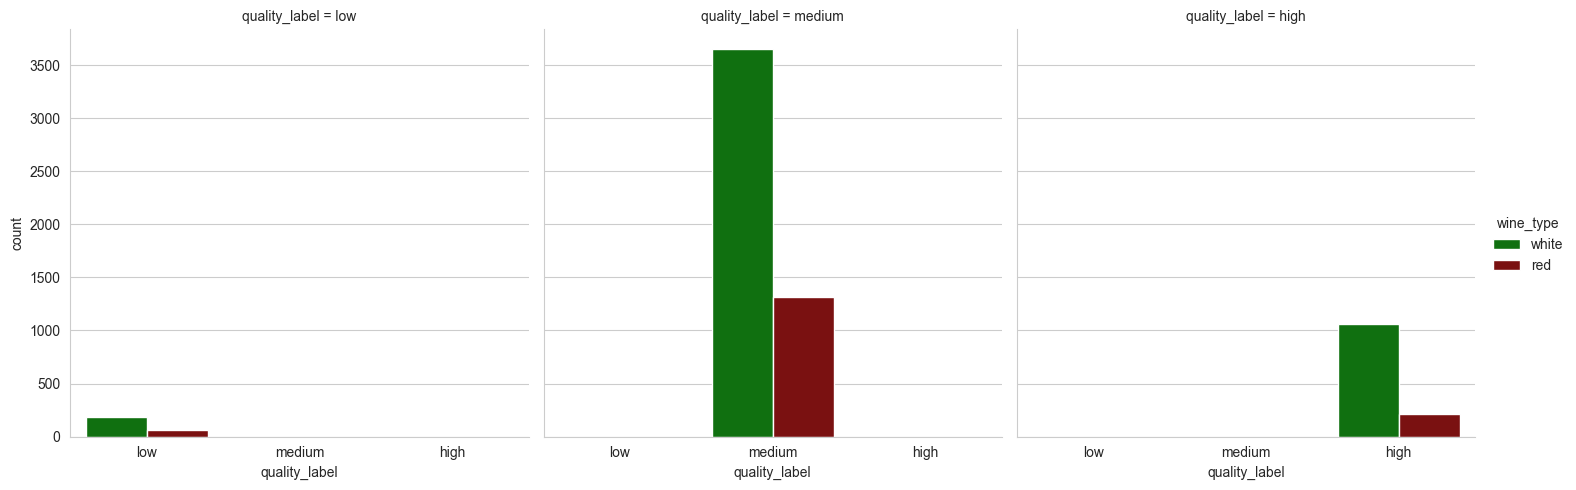

In [32]:
sns.catplot(data=wines, x="quality_label", hue="wine_type", col="quality_label", kind="count", palette={"red": "darkred", "white": "green"})

plt.show()

I am sure that this is not what exercise meant, but I couldn't find anything about catplot 3d 

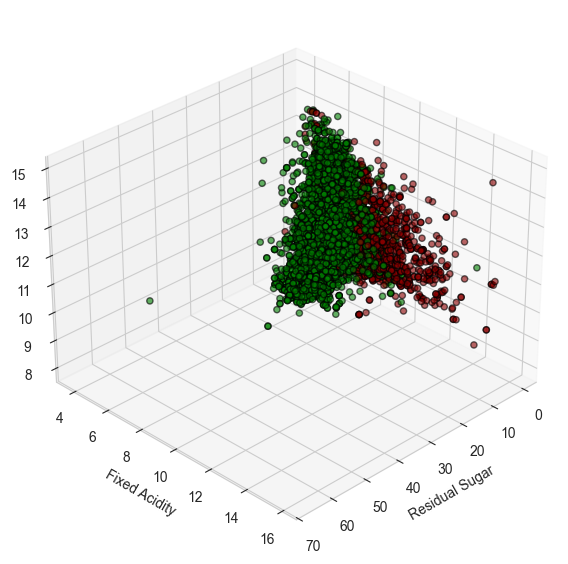

In [33]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(wines["residual sugar"], wines["fixed acidity"], wines["alcohol"],
           c=wines["wine_type"].map({"red": "darkred", "white": "green"}), alpha=0.6, edgecolors="k")

ax.set_xlabel("Residual Sugar")
ax.set_ylabel("Fixed Acidity")
ax.set_zlabel("Alcohol")

ax.view_init(elev=30, azim=45, roll=0)

plt.show()

Red wines have more fixed acidity \
White wines have more residual sugar and most of them have about 6-8 fixed acidity \
Alcohol does not seem to add any information about wine type \

Fun fact. I visualised this 4d chart for exercise with 3d charts. When I noticed my mistake I changed it. Then after analysing 3d chart I noticed more things, that I missed earlier. More dimensions sometimes make things harder

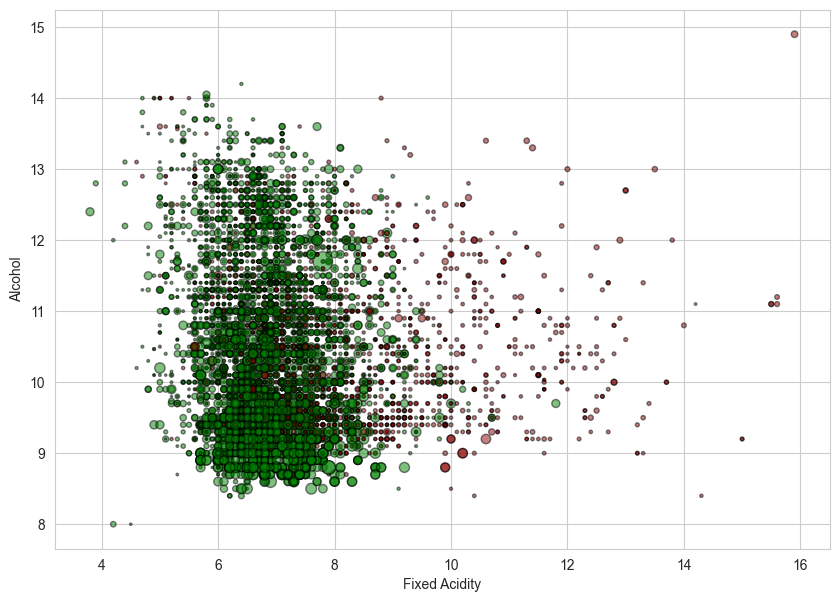

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(wines["fixed acidity"], wines["alcohol"], s=wines["residual sugar"] * 3,
            c=wines["wine_type"].map({"red": "darkred", "white": "green"}), alpha=0.5, edgecolors="k")


plt.xlabel("Fixed Acidity")
plt.ylabel("Alcohol")

plt.show()

This chart shows the same things just differently

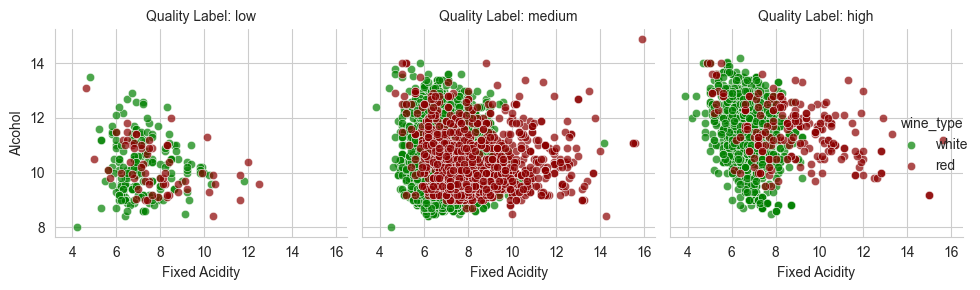

In [35]:
g = sns.FacetGrid(wines, col="quality_label", hue="wine_type", palette={"red": "darkred", "white": "green"})

g.map(sns.scatterplot, "fixed acidity", "alcohol", alpha=0.7)

g.add_legend()
g.set_axis_labels("Fixed Acidity", "Alcohol")

g.set_titles("Quality Label: {col_name}")

plt.tight_layout()
plt.show()

In low quality wines alcohol and fixed acidity are mixed together. We can't tell anything \
In medium and high quality wines we can see, that red wined have typically more fixed acidity \
In high quality wines we can see, that there are some white wines with low alcohol %

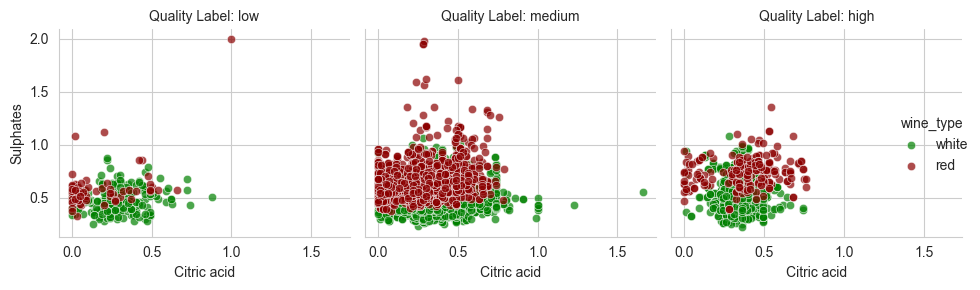

In [36]:
g = sns.FacetGrid(wines, col="quality_label", hue="wine_type", palette={"red": "darkred", "white": "green"})

g.map(sns.scatterplot, "citric acid", "sulphates", alpha=0.7)

g.add_legend()
g.set_axis_labels("Citric acid", "Sulphates")

g.set_titles("Quality Label: {col_name}")

plt.tight_layout()
plt.show()

In low quality wines we can't tell anything \
In medium quality wines we can see, that red wined have more sulphates. This becomes less clear in high quality wines \
Citric acid is the same for red and white wines across every quality label

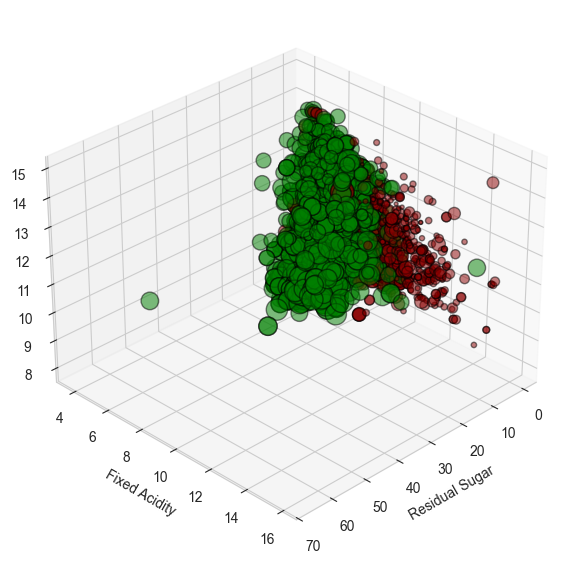

In [37]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(wines["residual sugar"], wines["fixed acidity"], wines["alcohol"],
           c=wines["wine_type"].map({"red": "darkred", "white": "green"}), 
           s=wines["total sulfur dioxide"] , alpha=0.5, edgecolors="k")

ax.set_xlabel("Residual Sugar")
ax.set_ylabel("Fixed Acidity")
ax.set_zlabel("Alcohol")

ax.view_init(elev=30, azim=45, roll=0)

plt.show()

This plot is hard to analise. I can see, that white wines have more TSD and red wines have more fixed acidity. This was harder to notice then when I used less dimensions

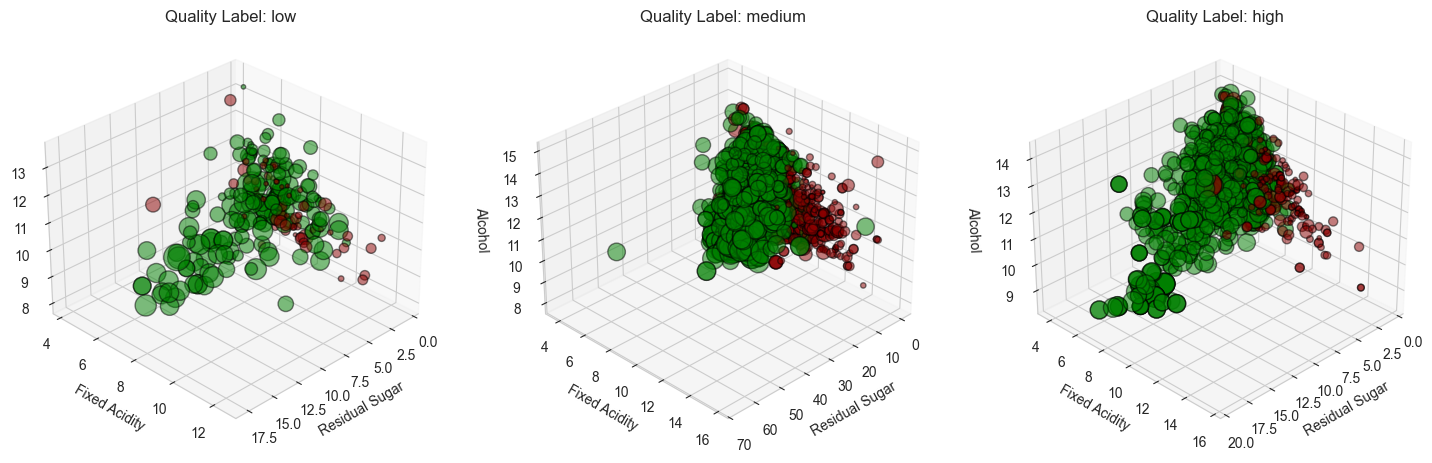

In [39]:
quality_labels = wines["quality_label"].cat.categories.tolist()

fig, axes = plt.subplots(1, len(quality_labels), figsize=(18, 7), subplot_kw={"projection": "3d"})


for i, quality in enumerate(quality_labels):
    ax = axes[i]
    
    subset = wines[wines["quality_label"] == quality]
    
    sc = ax.scatter(subset["residual sugar"], subset["fixed acidity"], subset["alcohol"],
                    c=subset["wine_type"].map({"red": "darkred", "white": "green"}), 
                    s=subset["total sulfur dioxide"], alpha=0.5, edgecolors="k")
    
    ax.set_xlabel("Residual Sugar")
    ax.set_ylabel("Fixed Acidity")
    ax.set_zlabel("Alcohol")
    ax.set_title(f"Quality Label: {quality}")
    
    ax.view_init(elev=30, azim=45, roll=0)


plt.show()

This last dimension makes it easier to analise because there are fewer points in each plot \
Now I can tell that white wines have low residual sugar when their quality label is medium




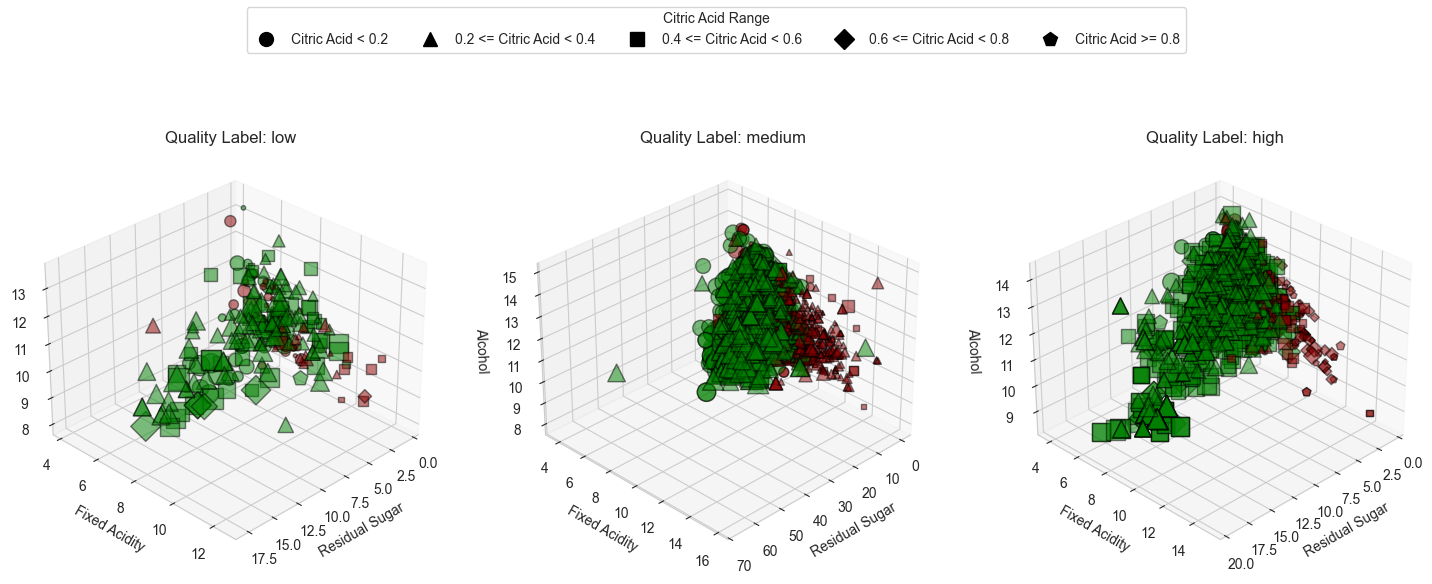

In [41]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.lines as mlines

scaler2 = MinMaxScaler()

quality_labels = wines["quality_label"].cat.categories.tolist()

fig, axes = plt.subplots(1, len(quality_labels), figsize=(18, 7), subplot_kw={"projection": "3d"})

marker_styles = ["o", "^", "s", "D", "p"]
marker_labels = ["Citric Acid < 0.2", "0.2 <= Citric Acid < 0.4", "0.4 <= Citric Acid < 0.6", "0.6 <= Citric Acid < 0.8", "Citric Acid >= 0.8"]

for i, quality in enumerate(quality_labels):
    ax = axes[i]
    
    subset = wines[wines["quality_label"] == quality].copy()
    
    subset["citric acid"] = scaler2.fit_transform(subset[["citric acid"]].to_numpy())
    
    for j, marker in enumerate(marker_styles):
        mask = (subset["citric acid"] >= j * 0.2) & (subset["citric acid"] < (j + 1) * 0.2)
        
        subset_marker = subset[mask]
        
        ax.scatter(subset_marker["residual sugar"], subset_marker["fixed acidity"], subset_marker["alcohol"],
                   c=subset_marker["wine_type"].map({"red": "darkred", "white": "green"}), 
                   s=subset_marker["total sulfur dioxide"], alpha=0.5,
                   marker=marker, edgecolors="k")
    
    ax.set_xlabel("Residual Sugar")
    ax.set_ylabel("Fixed Acidity")
    ax.set_zlabel("Alcohol")
    ax.set_title(f"Quality Label: {quality}")
    
    ax.view_init(elev=30, azim=45, roll=0)

handles = [
    mlines.Line2D([], [], color="black", marker=marker, linestyle="None", markersize=10, label=label) for marker, label in zip(marker_styles, marker_labels)
]

fig.legend(handles=handles, loc="upper center", ncol=5, title="Citric Acid Range")

plt.show()

It was a nightmare. It would take me 5 more hours without LLM. What's worse we can't see more information. I think, that for high quality wines white
wines has citric acid range about 0.2 to 0.4 and red wines have higher? 

I refuse to go beyond 4d ever again